# 0) Explanation of how Soundnet works

# 1) Data Import

Cette partie se compose de 3 cellules à exécuter afin de générer les données nécessaire à l'étude de cette base de données.  
L'exécution de ces cellules est assez long ~10-20 minutes car on travaille sur des modèles assez complexe.

In [2]:
!pip install datashader
import umap
import umap.plot
from real_util import *

In [3]:
!wget https://github.com/karoldvl/ESC-50/archive/master.zip
!unzip master.zip
!wget https://github.com/SunnerLi/SoundNet_Pytorch/raw/master/sound8.pth

--2020-12-04 07:56:55--  https://github.com/karoldvl/ESC-50/archive/master.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/karolpiczak/ESC-50/archive/master.zip [following]
--2020-12-04 07:56:55--  https://github.com/karolpiczak/ESC-50/archive/master.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/karolpiczak/ESC-50/zip/master [following]
--2020-12-04 07:56:55--  https://codeload.github.com/karolpiczak/ESC-50/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [                <=> ] 615

In [4]:
if __name__ == '__main__':
    model = SoundNet()
    model.load_state_dict(torch.load('sound8.pth'))

In [5]:
creation_data()
sound_samples, audio_paths = load_data()
X,X_out_1,X_out_2,X_out_3,X_out_4,X_out_6,X_out_7,y = extract_complete(sound_samples, audio_paths, model)
X_tronque = X[:1200]
y_tronque = y[:1200]
#X,X_out_4,X_out_6,X_out_7,y = extract_complete(sound_samples, audio_paths, model)

Processing: 0
Processing: 100
Processing: 200
Processing: 300
Processing: 400
Processing: 500
Processing: 600
Processing: 700
Processing: 800
Processing: 900
Processing: 1000
Processing: 1100
Processing: 1200
Processing: 1300
Processing: 1400
Processing: 1500
Processing: 1600
Processing: 1700
Processing: 1800
Processing: 1900
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


# 2) Transfert Learning

In this part we will perform Transfert Learning from the SoundNet model outputs.  
We will then use these outputs to train an SVM on the ESC-50 database

In [ ]:
custom_cv=custom_cv_5folds(X)
scaler = StandardScaler()
SVM = svm.LinearSVC(max_iter=10000)
pipe = Pipeline(steps=[('scaler', scaler), ('SVM', SVM)])

param_grid = {
    'SVM__C': np.logspace(-4, 1, 6),

}

search = GridSearchCV(pipe, param_grid, cv = custom_cv)
search.fit(X, y)
print(search.cv_results_)
print(search.best_score_)
print(search.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

{'mean_fit_time': array([ 1.95906124, 12.69617867, 22.55324688,  9.36251879, 13.70974183,
       22.78525124]), 'std_fit_time': array([0.28987942, 3.16025741, 3.25032525, 0.89317654, 0.5233843 ,
       0.18380359]), 'mean_score_time': array([0.00280099, 0.00297909, 0.00304327, 0.00285068, 0.00330482,
       0.00355353]), 'std_score_time': array([3.76793090e-05, 1.56225156e-04, 3.41171592e-04, 8.16777095e-05,
       5.71046245e-04, 4.64696260e-04]), 'param_SVM__C': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'SVM__C': 0.0001}, {'SVM__C': 0.001}, {'SVM__C': 0.01}, {'SVM__C': 0.1}, {'SVM__C': 1.0}, {'SVM__C': 10.0}], 'split0_test_score': array([0.5575, 0.66  , 0.725 , 0.7325, 0.6675, 0.63  ]), 'split1_test_score': array([0.5825, 0.6125, 0.69  , 0.7   , 0.6575, 0.625 ]), 'split2_test_score': array([0.5825, 0.665 , 0.7175, 0.725 , 0.6675, 0.625 ]), 'split3

We performed a GridSearch to find the optimal value of C in our example.  
It is also important to note that we also tried to vary other parameters like gamma or kernel however this did not increase our results.

In [6]:
custom_cv=custom_cv_5folds(X)
clf = make_pipeline(StandardScaler(), svm.LinearSVC(C=0.1,max_iter=10000))
scores = cross_val_score(clf, X, y, cv=custom_cv)

In [7]:
print(f'Score obtenu en Cross validation avec les meilleurs paramètres: {scores.mean():0.2f}')

Score obtenu en Cross validation avec les meilleurs paramètres: 0.72


We see that we get a score of 0.72 on a cross validation on the 5 official folds of ESC-50. This is very similar to the results obtained by researchers working on SoundNet( 0.75). This slight difference can be explained by the fact that we did not use Data Augmentation to train our SVM.

# 3) Visualization of the Database

In this part we will visualize the Soundnet outputs in 2 dimensions using Umap according to several factors in order to better understand the differences between the Soundnet outputs.

We chose to view all outputs. However for reasons of size we decided to keep only the first 3 folds for each output.

In [8]:
mapper_out_1 = umap.UMAP(metric='cosine').fit(X_out_1,y_tronque)
mapper_out_2 = umap.UMAP(metric='cosine').fit(X_out_2,y_tronque)
mapper_out_3 = umap.UMAP(metric='cosine').fit(X_out_3,y_tronque)
mapper_out_4 = umap.UMAP(metric='cosine').fit(X_out_4,y_tronque)
mapper_out_5 = umap.UMAP(metric='cosine').fit(X_tronque,y_tronque)
mapper_out_6 = umap.UMAP(metric='cosine').fit(X_out_6,y_tronque)
mapper_out_7 = umap.UMAP(metric='cosine').fit(X_out_7,y_tronque)

In [9]:
csv = pd.read_csv('ESC-50-master/meta/esc50.csv')
labels_complet = {}
values = csv.values
for d in values:
  labels_complet[d[2]]=d[3]


In [10]:
y_simple=[]
for i in y_tronque:
  y_simple.append(label[i//10])

We chose to display the labels under the 5 main classes of the ESC-50 (Animals, Natural soundscapes & water sounds, Human non-speech sounds,Interior/domestic sounds, Exterior/urban noises. Indeed with the 50 classes it is impossible to understand the results visually.

Text(0.5, 1.0, 'Output 7')

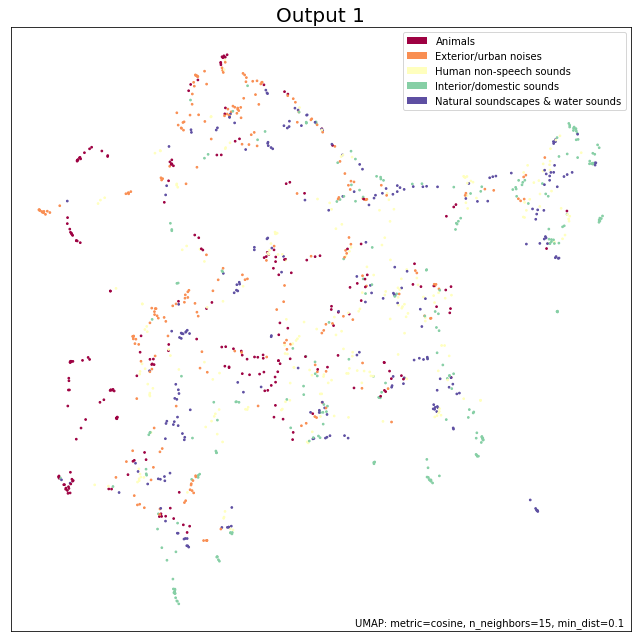

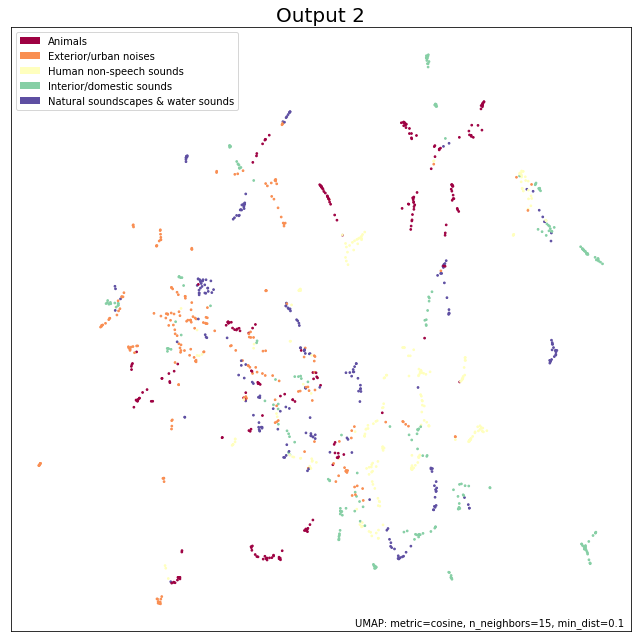

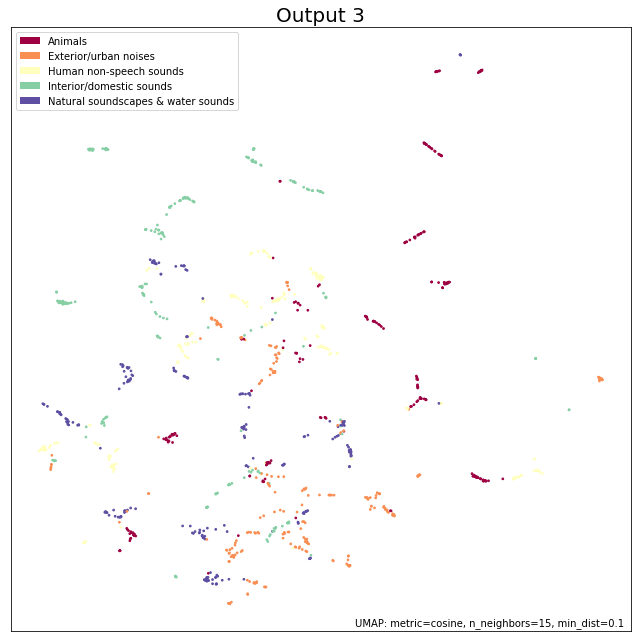

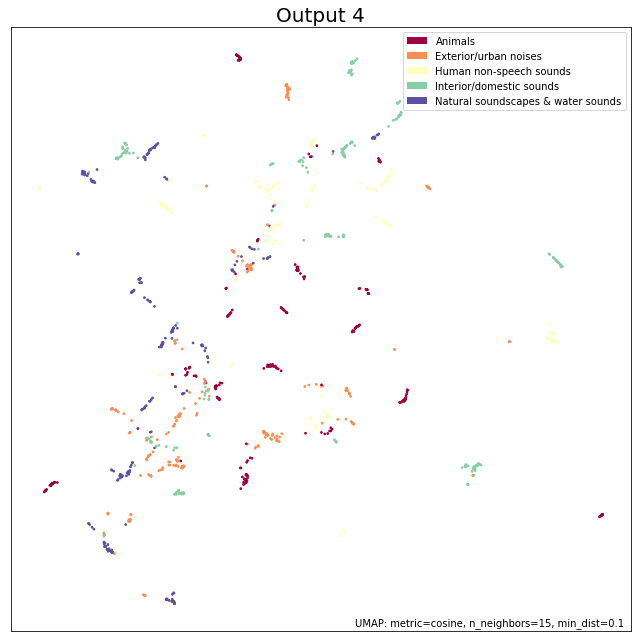

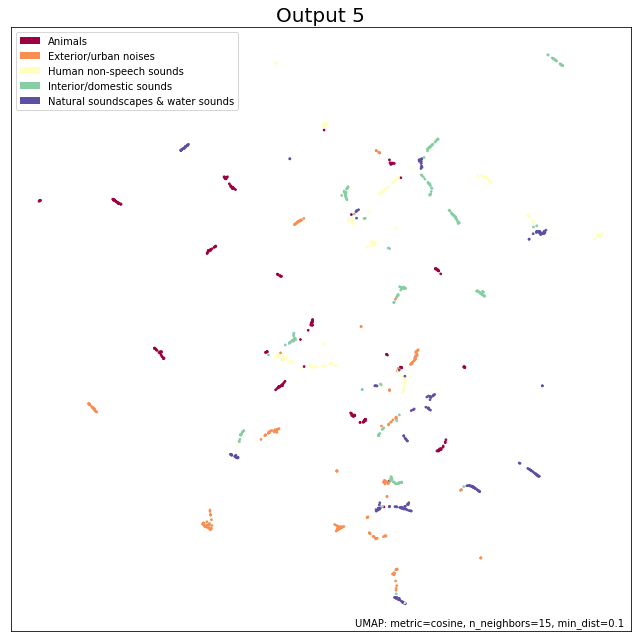

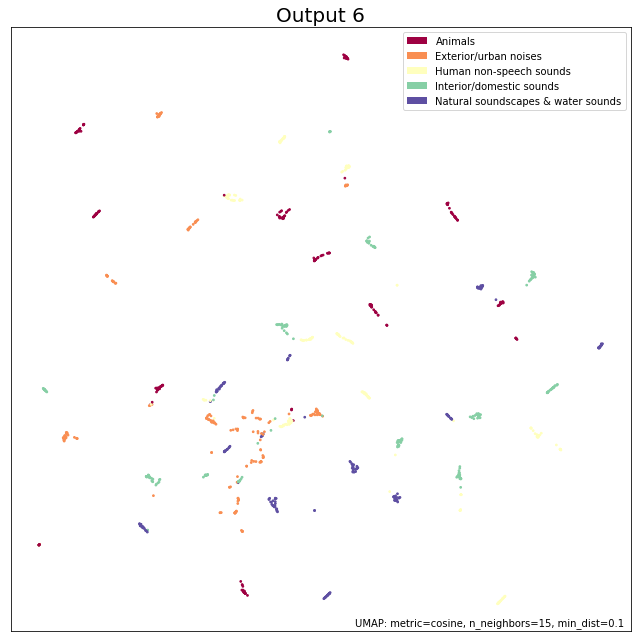

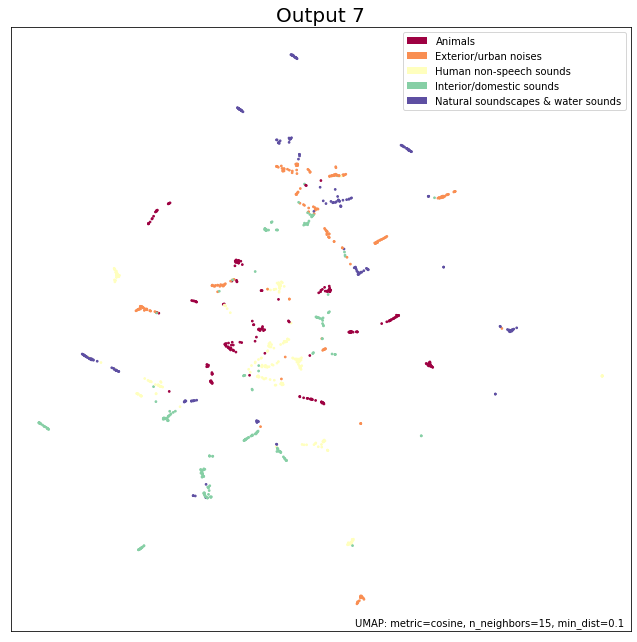

In [13]:
umap.plot.points(mapper_out_1,labels=np.asarray(y_simple))
plt.title("Output 1",fontsize=20)
umap.plot.points(mapper_out_2,labels=np.asarray(y_simple))
plt.title("Output 2",fontsize=20)
umap.plot.points(mapper_out_3,labels=np.asarray(y_simple))
plt.title("Output 3",fontsize=20)
umap.plot.points(mapper_out_4,labels=np.asarray(y_simple))
plt.title("Output 4",fontsize=20)
umap.plot.points(mapper_out_5,labels=np.asarray(y_simple))
plt.title("Output 5",fontsize=20)
umap.plot.points(mapper_out_6,labels=np.asarray(y_simple))
plt.title("Output 6",fontsize=20)
umap.plot.points(mapper_out_7,labels=np.asarray(y_simple))
plt.title("Output 7",fontsize=20)

First of all we notice that in all outputs it is very difficult to distinguish clusters corresponding to the 5 major classes. This makes sense because each large class contains 10 distinct classes and these classes are sometimes very distinct from each other (a dog and an insect are considered as animals but their sound is very different).
Then we notice that for outputs 1 and 2, the data are not distinguishable from each other (no appearance of mini cluster).  
However looking at outputs 3,4,5 and 6 we observe the appearance of mini clusters of the same color corresponding surely to the different subclasses. It can be noted that output 5 gives a clearer separation which explains why we use this output to obtain the best results in learning transfer.
Output 7 surprisingly gives worse results than previous outputs even if it remains more efficient than outputs 1 and 2.

We will now focus on output 5 (because it is the one that gives the best results) to observe the different subclasses of the main classes.

In [14]:
X_animals = []
y_animals = []
y_labels_animals = []
X_natural = []
y_natural = []
y_labels_natural = []
X_human = []
y_human = []
y_labels_human = []
X_interior = []
y_interior = []
y_labels_interior = []
X_exterior = []
y_exterior = []
y_labels_exterior = []
for i in range(len(y)):
  categorie = y[i]//10
  if(categorie==0):
    X_animals.append(X[i])
    y_animals.append(y[i])
    y_labels_animals.append(labels_complet[y[i]])
  if(categorie==1):
    X_natural.append(X[i])
    y_natural.append(y[i])
    y_labels_natural.append(labels_complet[y[i]])
  if(categorie==2):
    X_human.append(X[i])
    y_human.append(y[i])
    y_labels_human.append(labels_complet[y[i]])
  if(categorie==3):
    X_interior.append(X[i])
    y_interior.append(y[i])
    y_labels_interior.append(labels_complet[y[i]])
  if(categorie==4):
    X_exterior.append(X[i])
    y_exterior.append(y[i])
    y_labels_exterior.append(labels_complet[y[i]])

In [15]:
mapper_animals = umap.UMAP(metric='cosine').fit(X_animals,y_animals)
mapper_natural = umap.UMAP(metric='cosine').fit(X_natural,y_natural)
mapper_human = umap.UMAP(metric='cosine').fit(X_human,y_human)
mapper_interior = umap.UMAP(metric='cosine').fit(X_interior,y_interior)
mapper_exterior = umap.UMAP(metric='cosine').fit(X_exterior,y_exterior)

Text(0.5, 1.0, 'Exterior/urban noises')

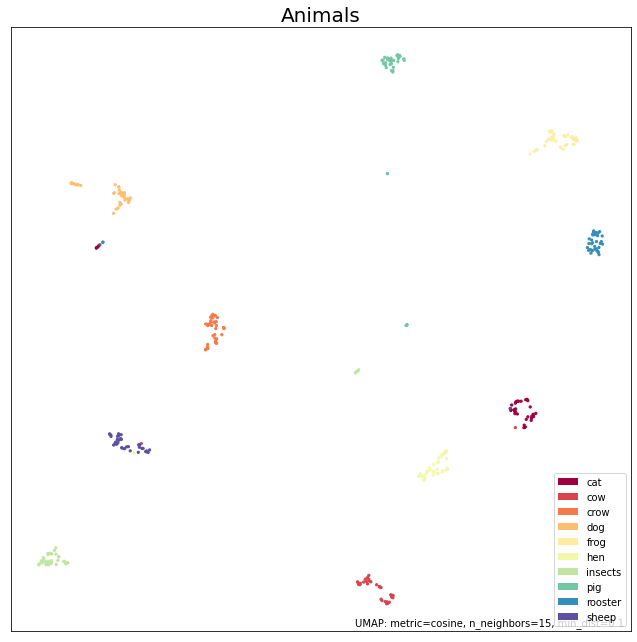

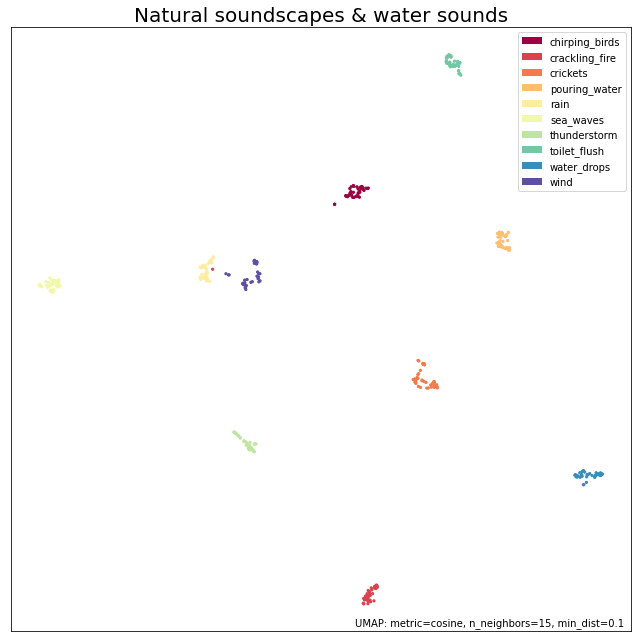

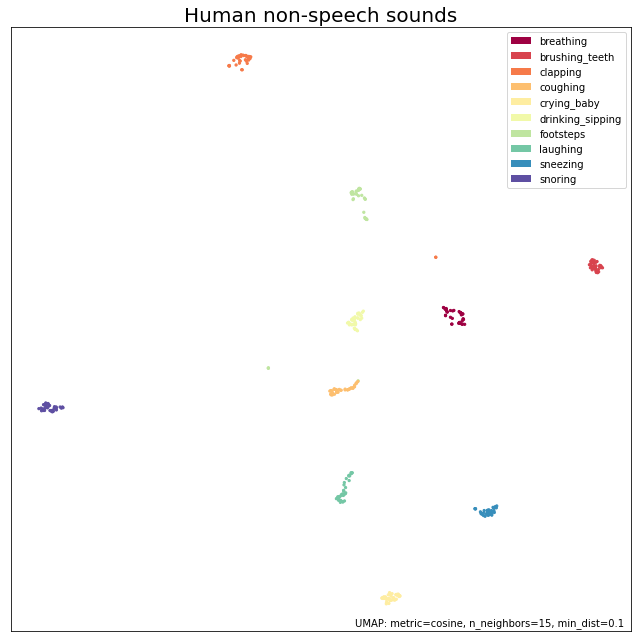

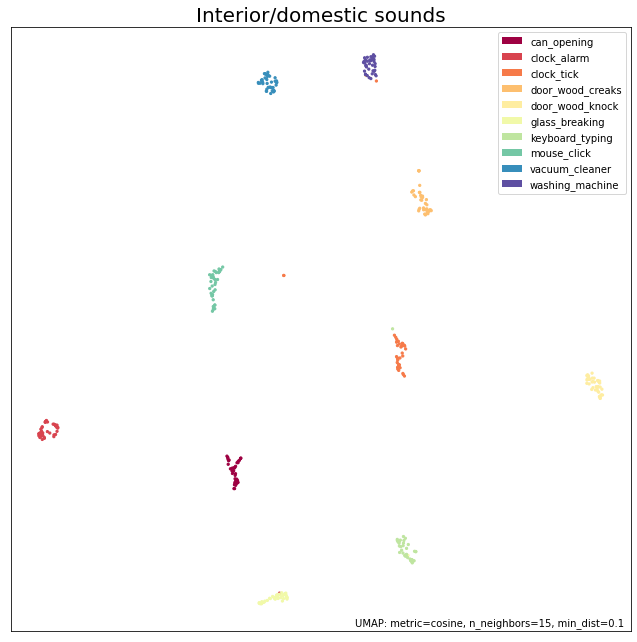

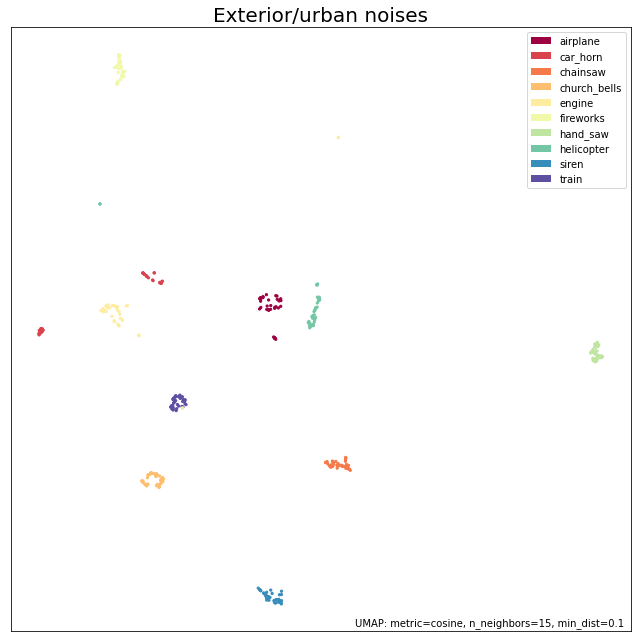

In [16]:
umap.plot.points(mapper_animals,labels=np.asarray(y_labels_animals))
plt.title("Animals",fontsize=20)
umap.plot.points(mapper_natural,labels=np.asarray(y_labels_natural))
plt.title("Natural soundscapes & water sounds",fontsize=20)
umap.plot.points(mapper_human,labels=np.asarray(y_labels_human))
plt.title("Human non-speech sounds",fontsize=20)
umap.plot.points(mapper_interior,labels=np.asarray(y_labels_interior))
plt.title("Interior/domestic sounds",fontsize=20)
umap.plot.points(mapper_exterior,labels=np.asarray(y_labels_exterior))
plt.title("Exterior/urban noises",fontsize=20)

It is noted that all subclasses are easily distinguishable from each other. This confirms our good results obtained during cross validation.
However we observe that sometimes some points are not found in their cluster or even in a different cluster. We will now focus on the classes that are confused with the others using the confusion matrix.

In [18]:
X_train = X[400:]
y_train = y[400:]
X_test = X[:400]
y_test = y[:400]
clf = make_pipeline(StandardScaler(), svm.LinearSVC(C=0.1,max_iter=10000))
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvc',
                 LinearSVC(C=0.1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=10000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

normalized confusion matrix


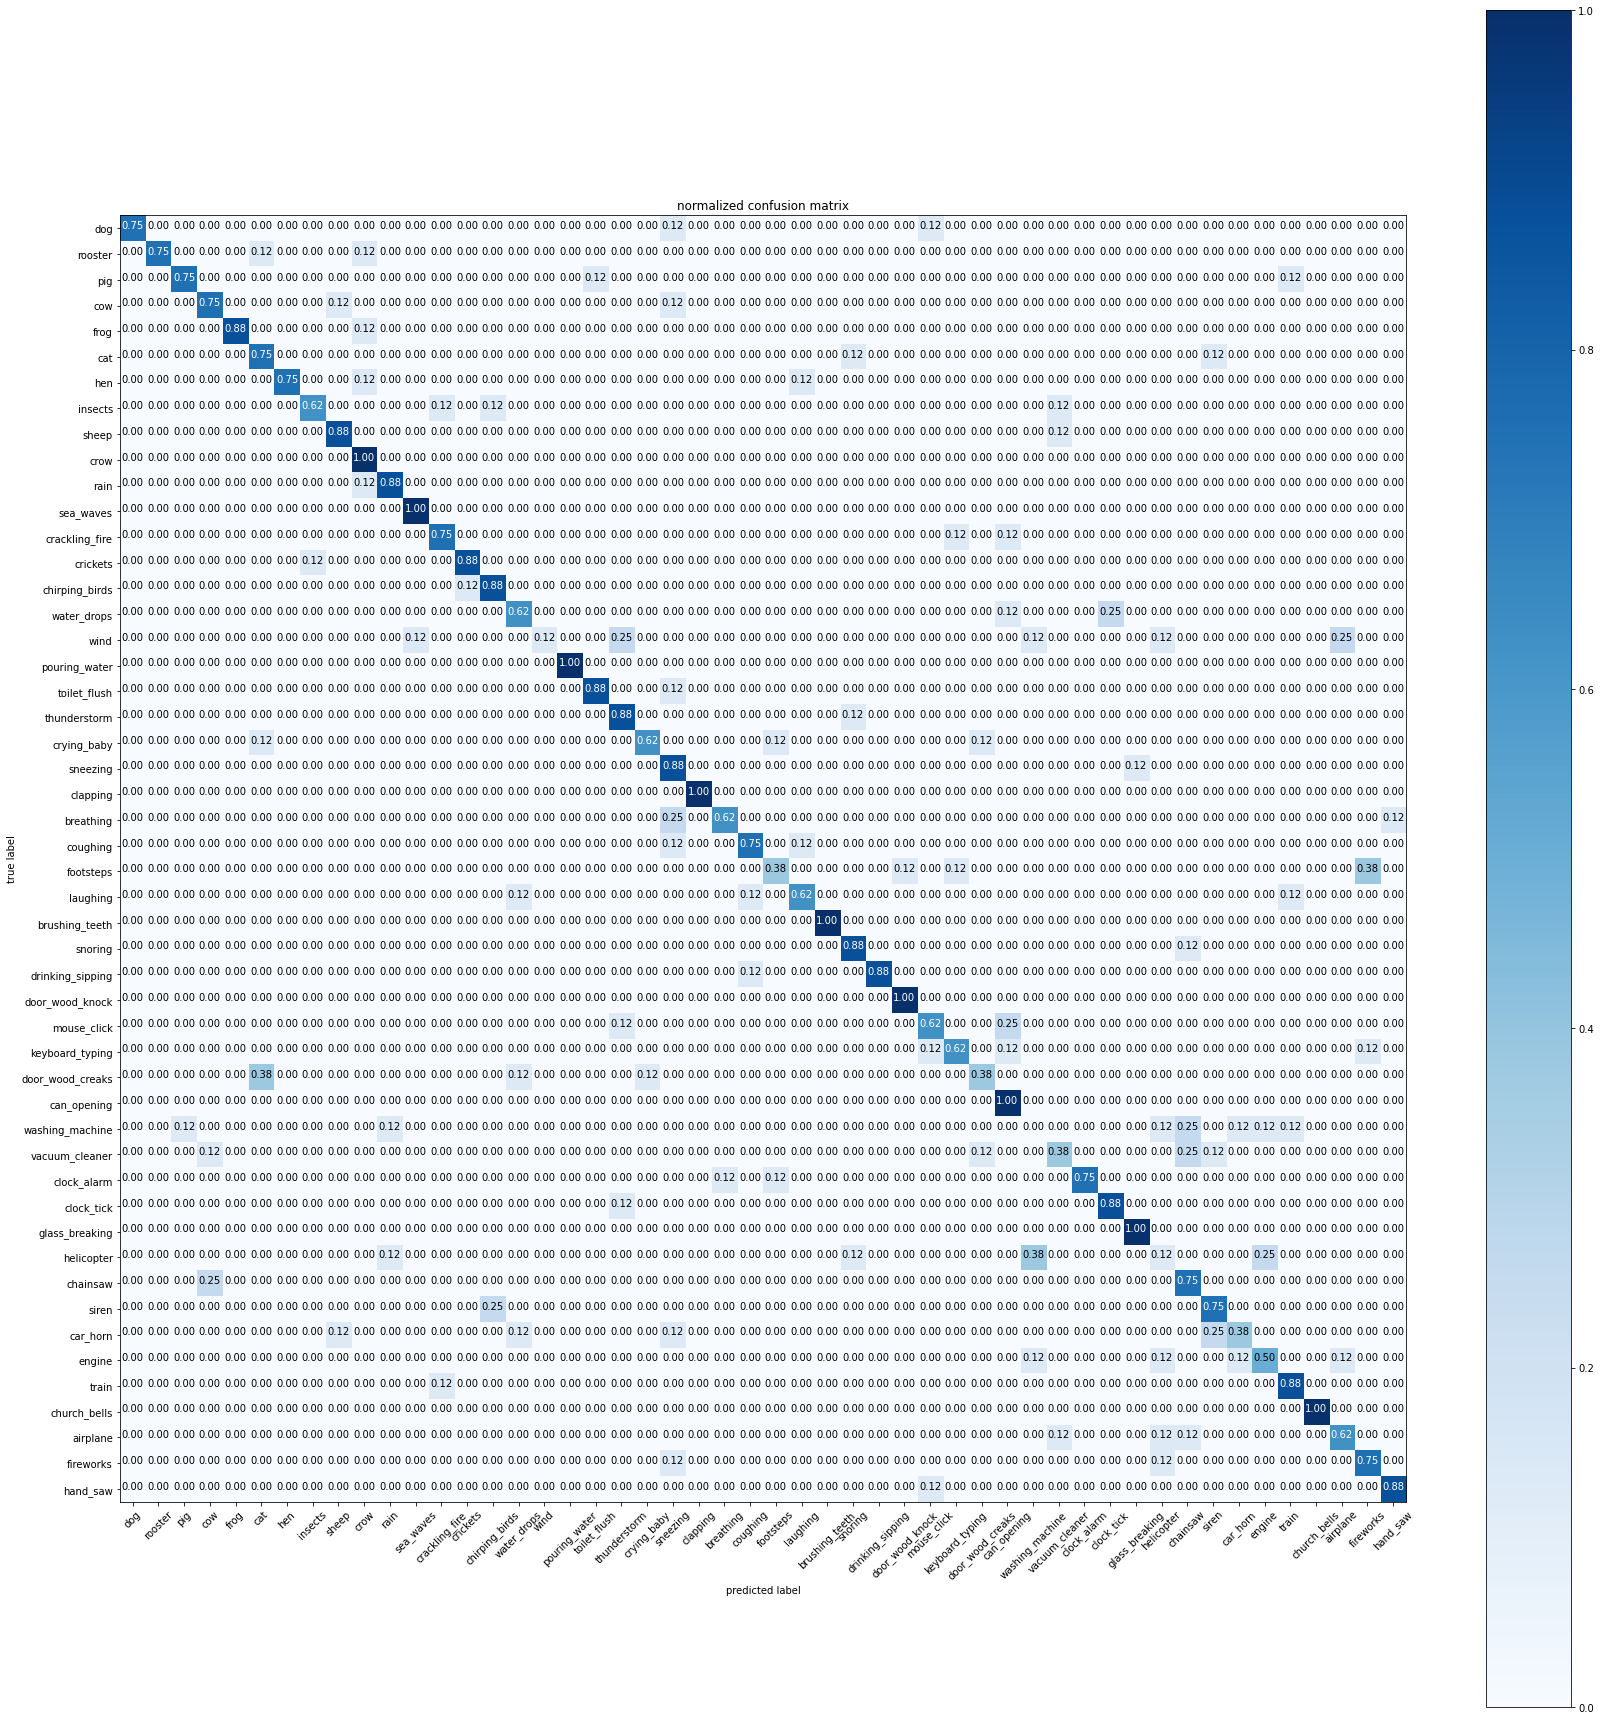

In [23]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
np.set_printoptions(precision=2)

#class_names = range(50)
class_names = []
for i in range(50):
  class_names.append(labels_complet[i])
# plot normalized confusion matrix
plt.figure(figsize=(24, 24))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='normalized confusion matrix')

plt.show()

Using this matrix of confusion we observe that some classes are particularly difficult to predict.  
We can mention of course the washing machine that was not correctly predicted on the whole of this fold.  
We will display the labels of classes that are difficult to predict to check if the results of the confusion matrix are verified with the visualization.

In [24]:
list_difficult_feature = ["water_drops","clock_alarm","wind","toilet_flush","airplane","breathing","crying_baby","footsteps","fireworks","keyboard_typing","door_wood_creaks","cat","washing_machine","chainsaw","helicopter","can_opening","siren","cow","car_horn","crickets"]

In [27]:
X_difficult = []
y_difficult = []
y_labels_difficult = []
for i in range(len(y_test)):
  if labels_complet[y_test[i]] in list_difficult_feature:
    X_difficult.append(X_test[i])
    y_difficult.append(y_test[i])
    y_labels_difficult.append(labels_complet[y_test[i]])

Text(0.5, 1.0, 'Labels difficile')

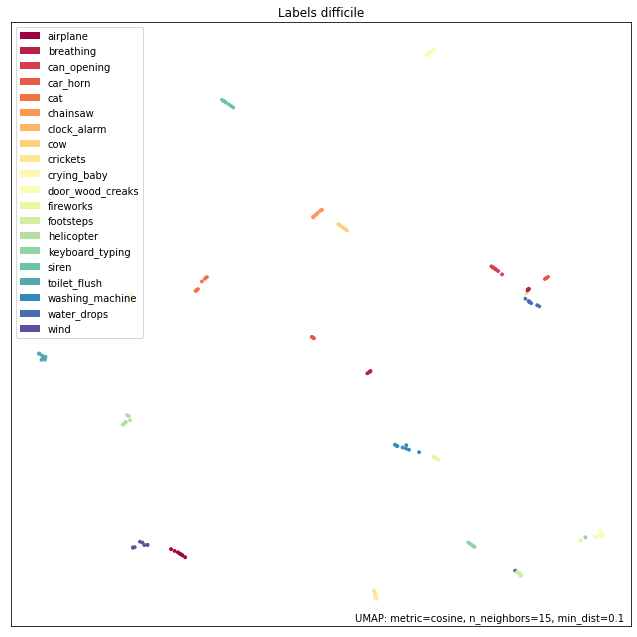

In [30]:
mapper_difficult = umap.UMAP(metric='cosine').fit(X_difficult,y_difficult)
umap.plot.points(mapper_difficult,labels=np.asarray(y_labels_difficult))
plt.title("Labels difficile")